In [ ]:
import math
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Stock Price Data.csv to Stock Price Data.csv


In [ ]:
df = pd.read_csv('Stock Price Data.csv')

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,31/12/2009,37.068000,37.131000,36.948751,36.998249,36.998249,4892780.4
1,4/01/2010,37.187250,37.394250,37.092751,37.234500,37.234500,7115420.4
2,5/01/2010,37.151249,37.275000,36.780001,37.162500,37.162500,7148180.4
3,6/01/2010,37.218750,37.275000,37.045501,37.133251,37.133251,4610180.4
4,7/01/2010,37.166999,37.263749,36.946500,37.059000,37.059000,4356020.4
...,...,...,...,...,...,...,...
2260,24/12/2018,129.426000,132.755997,128.544003,129.597002,129.597002,4249370.4
2261,26/12/2018,130.667997,138.209994,130.308002,138.155997,138.155997,7299830.4
2262,27/12/2018,136.320003,142.079997,135.455997,142.079997,142.079997,7170950.4
2263,28/12/2018,142.800000,143.592004,139.749000,141.611993,141.611993,6548600.4


In [ ]:
df.set_index(df['Date'], inplace=True)

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
31/12/2009,31/12/2009,37.068000,37.131000,36.948751,36.998249,36.998249,4892780.4
4/01/2010,4/01/2010,37.187250,37.394250,37.092751,37.234500,37.234500,7115420.4
5/01/2010,5/01/2010,37.151249,37.275000,36.780001,37.162500,37.162500,7148180.4
6/01/2010,6/01/2010,37.218750,37.275000,37.045501,37.133251,37.133251,4610180.4
7/01/2010,7/01/2010,37.166999,37.263749,36.946500,37.059000,37.059000,4356020.4
...,...,...,...,...,...,...,...
24/12/2018,24/12/2018,129.426000,132.755997,128.544003,129.597002,129.597002,4249370.4
26/12/2018,26/12/2018,130.667997,138.209994,130.308002,138.155997,138.155997,7299830.4
27/12/2018,27/12/2018,136.320003,142.079997,135.455997,142.079997,142.079997,7170950.4


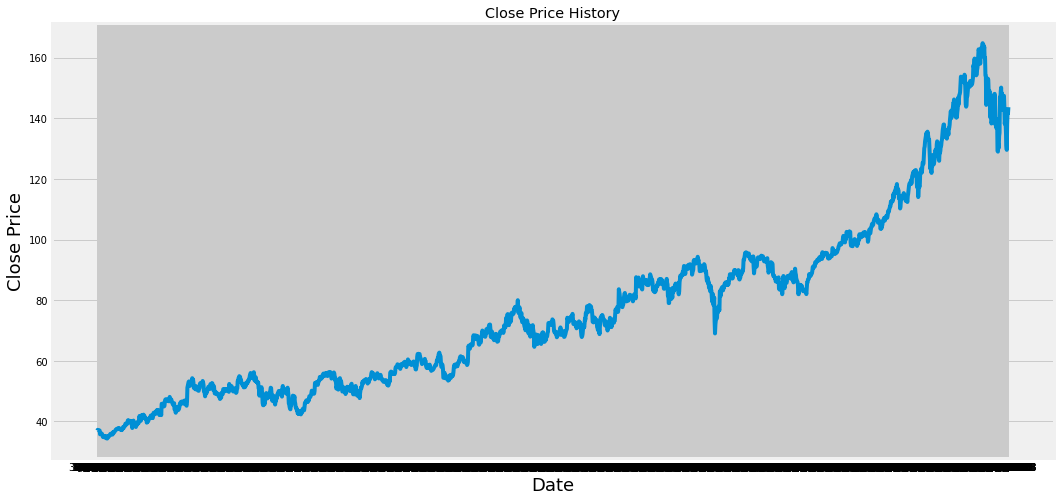

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)
plt.show()

In [ ]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

1812

In [ ]:
#Scale Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.02016768],
       [0.02197916],
       [0.02142709],
       ...,
       [0.82589195],
       [0.82230349],
       [0.83810646]])

In [ ]:
#Create Training Dataset
train_data = scaled_data[0:training_data_len,:]
#Split the data into x_train and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i, 0])
  if i<= 60:
    print(x_train)
    print(y_train)
    print()

[array([2.01676824e-02, 2.19791570e-02, 2.14270907e-02, 2.12028183e-02,
       2.06334962e-02, 2.08232702e-02, 1.99606658e-02, 1.07135454e-02,
       1.10758376e-02, 1.22662359e-02, 1.13001100e-02, 1.28010465e-02,
       1.11621034e-02, 8.28099455e-03, 4.24401222e-03, 3.53667023e-03,
       5.74494859e-03, 5.72769282e-03, 3.58843754e-03, 2.53605255e-03,
       5.34814481e-03, 5.14111499e-03, 6.10724091e-03, 6.03820488e-04,
       0.00000000e+00, 6.90033698e-05, 4.45104196e-03, 4.57180612e-03,
       6.69380556e-03, 5.19286919e-03, 7.10785200e-03, 8.10847635e-03,
       1.09895719e-02, 1.18004222e-02, 1.20074520e-02, 1.06272796e-02,
       1.26975382e-02, 1.02304890e-02, 1.01269675e-02, 1.52163415e-02,
       1.68380289e-02, 1.46470194e-02, 1.51990857e-02, 1.75971250e-02,
       1.87530117e-02, 2.00124200e-02, 2.26174890e-02, 2.30142797e-02,
       2.35145918e-02, 2.33248178e-02, 2.52053023e-02, 2.52915548e-02,
       2.55848503e-02, 2.40494023e-02, 2.66199730e-02, 2.59126311e-02,
     

In [ ]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
#Reshape
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1752, 60, 1)

In [ ]:
#Build LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile Model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train Model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1752/1752 [==============================] - 36s 21ms/step - loss: 5.4615e-04


In [ ]:
#Create the testing data set
test_data=scaled_data[training_data_len-60:,:]
#Create data sets x_test y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])
  

In [ ]:
#Convert data to numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(453, 60, 1)

In [ ]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#RMSE
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

8.860650930622285

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


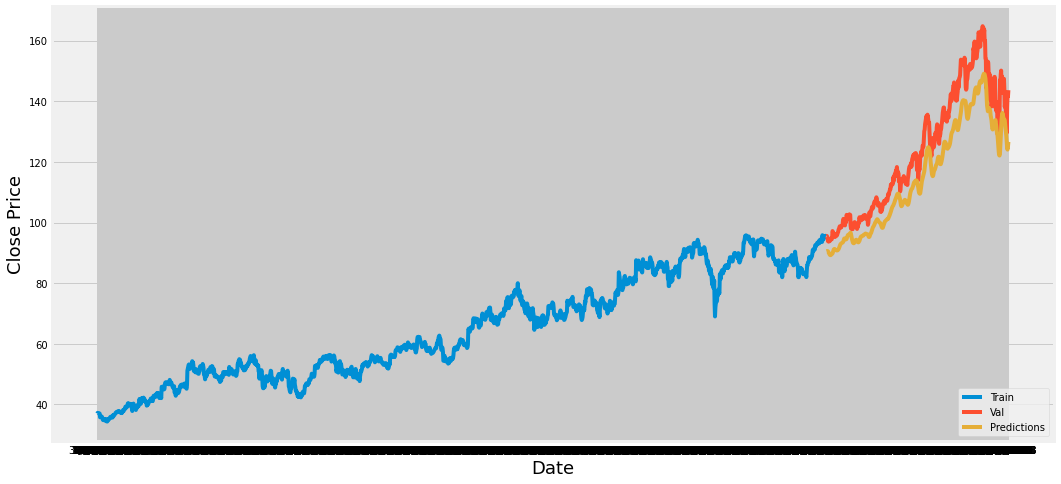

In [ ]:
#Plot data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
Date,,
15/03/2017,95.532003,90.538521
16/03/2017,95.567997,90.591599
17/03/2017,95.126999,90.623161
20/03/2017,95.010001,90.573593
21/03/2017,93.795003,90.477982
...,...,...
24/12/2018,129.597002,126.435234
26/12/2018,138.155997,124.401299
27/12/2018,142.079997,124.067993


In [ ]:
df_new = df.filter(['Close'])
last_60_days = df_new[-60:].values

for i in range(60, 415):
    last_60_days_scaled = scaler.transform(last_60_days)
    x_test = []
    x_test.append(last_60_days_scaled[i-60:i, 0])
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    predict = model.predict(x_test)
    predict_value = scaler.inverse_transform(predict)
    last_60_days = np.append(last_60_days, predict_value)
    last_60_days = np.reshape(last_60_days, (len(last_60_days), 1))

In [ ]:
predicted = last_60_days[60:len(last_60_days)]
predicted

array([[128.38990784],
       [127.53456879],
       [125.63054657],
       [123.24569702],
       [120.67227936],
       [118.06296539],
       [115.49922943],
       [113.02487946],
       [110.66291046],
       [108.42390442],
       [106.3107605 ],
       [104.32138824],
       [102.45048523],
       [100.69068909],
       [ 99.03353882],
       [ 97.47009277],
       [ 95.99140167],
       [ 94.58891296],
       [ 93.25461578],
       [ 91.98121643],
       [ 90.76226044],
       [ 89.59204865],
       [ 88.46566772],
       [ 87.37896729],
       [ 86.32845306],
       [ 85.31118011],
       [ 84.32474518],
       [ 83.36715698],
       [ 82.43678284],
       [ 81.53227997],
       [ 80.65249634],
       [ 79.79649353],
       [ 78.9634552 ],
       [ 78.15266418],
       [ 77.36348724],
       [ 76.59529877],
       [ 75.84753418],
       [ 75.11966705],
       [ 74.41114044],
       [ 73.72144318],
       [ 73.05005646],
       [ 72.39647675],
       [ 71.76020813],
       [ 71

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Sample Submission.csv to Sample Submission.csv


In [ ]:
df_submission = pd.read_csv('Sample Submission.csv')

In [ ]:
df_submission = df_submission.copy(deep=True)
df_submission['Close'] = predicted
df_submission.to_csv('LSTM_prediction.csv', index=False)

In [ ]:
 files.download('LSTM_prediction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>